## LAB01 Detección de pishing

#### Paula Camila Gonzalez Ortega, 18398
#### Diana Ximena de León Figueroa, 18607

In [18]:
import pandas as pd
import numpy as np
import  re
import  matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse, urlencode
from pandas_profiling import ProfileReport

### Exploración de datos

In [3]:
df = pd.read_csv('dataset_pishing.csv')

In [4]:
df.head()

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,0,1,0,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,1,0,0,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,1,0,1,0,0,0,0,0,1,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,0,0,0,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,0,1,0,0,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 73 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   ip                          11430 non-null  int64  
 2   nb_www                      11430 non-null  int64  
 3   nb_com                      11430 non-null  int64  
 4   nb_dslash                   11430 non-null  int64  
 5   http_in_path                11430 non-null  int64  
 6   punycode                    11430 non-null  int64  
 7   port                        11430 non-null  int64  
 8   tld_in_path                 11430 non-null  int64  
 9   tld_in_subdomain            11430 non-null  int64  
 10  abnormal_subdomain          11430 non-null  int64  
 11  nb_subdomains               11430 non-null  int64  
 12  prefix_suffix               11430 non-null  int64  
 13  random_domain               114

##### Muestre la cantidad de observaciones etiquetadas en la columna status como “legit” y como “pishing”. ¿Está balanceado el dataset?

Esta balanceado

In [6]:
df['status'].value_counts() 

legitimate    5715
phishing      5715
Name: status, dtype: int64

### Derivación de las características

In [7]:
def getDomain(url):
    return urlparse(url).netloc
    
def getProtocol(url):
    return 1 if urlparse(url).scheme == 'https' else 0
    
def getSpecialCharacters(url):
    count_characters = 0
    count_characters += url.count('.')
    count_characters += url.count('-')
    count_characters += url.count('@')
    count_characters += url.count('?')
    count_characters += url.count('&')
    count_characters += url.count('|')
    count_characters += url.count('=')
    count_characters += url.count('_')
    count_characters += url.count('~')
    count_characters += url.count('%')
    count_characters += url.count('/')
    count_characters += url.count('*')
    count_characters += url.count(':')
    count_characters += url.count(',')
    count_characters += url.count(';')
    count_characters += url.count('$')
    count_characters += url.count('%20')
    count_characters += url.count(' ')
    return count_characters

In [8]:
df['longitud_url'] = df['url'].str.len()
df['longitud_hostname'] = df['url'].apply(getDomain).str.len()
df['special_characters'] = df['url'].apply(getSpecialCharacters)
df['is_https'] = df['url'].apply(getProtocol)
df['ratio_digits_url'] = df['url'].str.count('[0-9]') / df['url'].str.len()
df['ratio_digits_domain'] = df['url'].apply(getDomain).str.count('[0-9]') / df['url'].apply(getDomain).str.len()

In [9]:
df['longitud_url']

0         37
1         77
2        126
3         18
4         55
        ... 
11425     45
11426     84
11427    105
11428     38
11429    477
Name: longitud_url, Length: 11430, dtype: int64

In [10]:
df['longitud_hostname']

0        19
1        23
2        50
3        11
4        15
         ..
11425    17
11426    18
11427    16
11428    30
11429    14
Name: longitud_hostname, Length: 11430, dtype: int64

In [11]:
df['special_characters']

0         7
1         7
2        19
3         5
4        10
         ..
11425     7
11426    16
11427    17
11428     6
11429    99
Name: special_characters, Length: 11430, dtype: int64

In [12]:
df['is_https']

0        0
1        0
2        1
3        0
4        0
        ..
11425    0
11426    0
11427    1
11428    0
11429    0
Name: is_https, Length: 11430, dtype: int64

In [13]:
df['ratio_digits_url']

0        0.000000
1        0.220779
2        0.150794
3        0.000000
4        0.000000
           ...   
11425    0.000000
11426    0.023810
11427    0.142857
11428    0.000000
11429    0.085954
Name: ratio_digits_url, Length: 11430, dtype: float64

In [14]:
df['ratio_digits_domain']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
11425    0.000000
11426    0.000000
11427    0.000000
11428    0.000000
11429    0.785714
Name: ratio_digits_domain, Length: 11430, dtype: float64

In [15]:
df['url']

0                    http://www.crestonwood.com/router.php
1        http://shadetreetechnology.com/V4/validation/a...
2        https://support-appleld.com.secureupdate.duila...
3                                       http://rgipt.ac.in
4        http://www.iracing.com/tracks/gateway-motorspo...
                               ...                        
11425        http://www.fontspace.com/category/blackletter
11426    http://www.budgetbots.com/server.php/Server%20...
11427    https://www.facebook.com/Interactive-Televisio...
11428               http://www.mypublicdomainpictures.com/
11429    http://174.139.46.123/ap/signin?openid.pape.ma...
Name: url, Length: 11430, dtype: object

### Ejemplo

In [29]:
df.iloc[:, [0, 67, 68, 69, 70, 71, 72 ]].head()

,url,longitud_url,longitud_hostname,special_characters,is_https,ratio_digits_url,ratio_digits_domain
0,http://www.crestonwood.com/router.php,37,19,7,0,0.000000,0.0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,7,0,0.220779,0.0
2,https://support-appleld.com.secureupdate.duila...,126,50,19,1,0.150794,0.0
3,http://rgipt.ac.in,18,11,5,0,0.000000,0.0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,10,0,0.000000,0.0


### Preprocesamiento

In [32]:
# Codificacion de variable objetivo
df['status'] = df['status'].replace(to_replace='phishing', value = 1)
df['status'] = df['status'].replace(to_replace='legitimate', value = 0)

In [33]:
df['status']

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

In [34]:
df.drop(['url'], axis = 1, inplace = True)

### Visualización de resultados

In [35]:
profile = ProfileReport(df, title='Reporte Pishing final')
profile.to_file('Reporte Deteccion de Pishing presentacion.html')

Summarize dataset:   0%|          | 0/85 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Feature Importance in the prediction of status


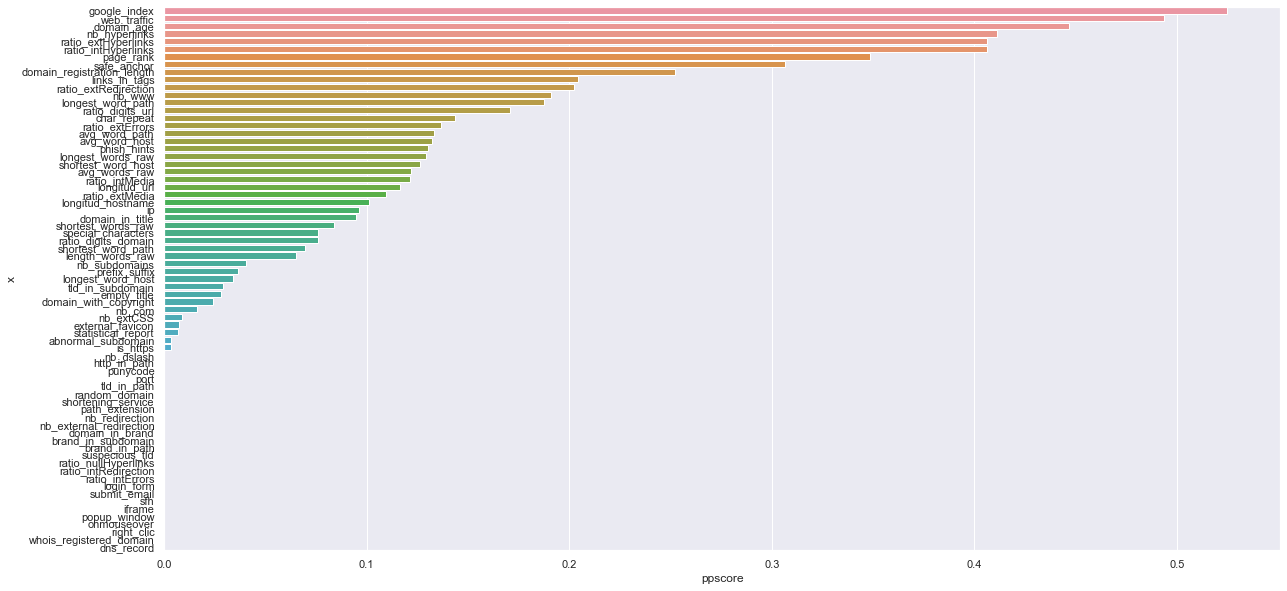

In [42]:
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

eda_numcat(df, "status", 
           method = "pps") 

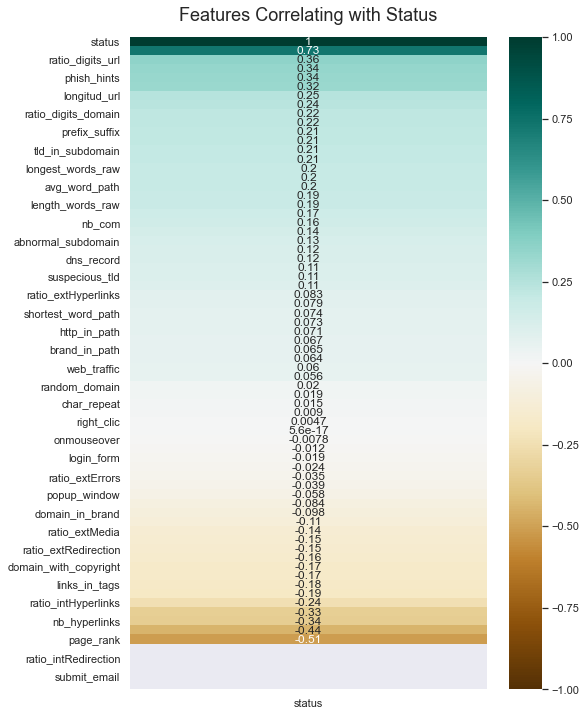

In [43]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['status']].sort_values(by='status', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Status', fontdict={'fontsize':18}, pad=16);

Con el reporte generado fue posible decidir que solo algunas columnas se relacionan mucho con la variable 'status', a continuacion se detallan las mismas:
'nb_com'                  
,'tld_in_subdomain'            
,'abnormal_subdomain'                      
,'prefix_suffix'               
,'longest_words_raw'           
,'phish_hints '                            
,'suspecious_tld '                    
,'dns_record '                                       
,'longitud_url '                                 
,'ratio_digits_url '           
,'ratio_digits_domain'      

### Selección de características

In [59]:
## se guardan solo las columnas importantes y con bastante correlación
new_df = df[['status','nb_com', 'tld_in_subdomain', 'abnormal_subdomain','prefix_suffix', 'longest_words_raw', 'phish_hints', 'suspecious_tld', 'dns_record', 'longitud_url', 'ratio_digits_url', 'ratio_digits_domain']]

In [60]:
# se eliminan los datos duplicados
new_df.drop_duplicates()

,status,nb_com,tld_in_subdomain,abnormal_subdomain,prefix_suffix,longest_words_raw,phish_hints,suspecious_tld,dns_record,longitud_url,ratio_digits_url,ratio_digits_domain
0,0,0,0,0,0,11,0,0,1,37,0.000000,0.000000
1,1,0,0,0,0,32,0,0,0,77,0.220779,0.000000
2,1,1,1,0,1,17,0,0,0,126,0.150794,0.000000
3,0,0,0,0,0,5,0,0,0,18,0.000000,0.000000
4,0,0,0,0,0,11,0,0,0,55,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
11423,1,0,0,0,0,26,0,0,0,85,0.047059,0.000000
11424,0,1,0,0,0,8,0,0,0,62,0.000000,0.000000
11426,1,1,0,0,0,10,0,0,0,84,0.023810,0.000000
11427,0,0,0,0,0,15,0,0,0,105,0.142857,0.000000


## Implementación del modelo

In [62]:
import sklearn
from sklearn import metrics, model_selection, tree

#### Separación de datos

In [63]:
target = new_df['status']
feature_matrix = new_df.drop(['status'], axis=1)

print('Final features:', feature_matrix.columns)
feature_matrix.head()

feature_matrix_train, feature_matrix_test, target_train, target_test = model_selection.train_test_split(feature_matrix, target, test_size=0.30, train_size = 0.55, random_state=31)


Final features: Index(['nb_com', 'tld_in_subdomain', 'abnormal_subdomain', 'prefix_suffix',
       'longest_words_raw', 'phish_hints', 'suspecious_tld', 'dns_record',
       'longitud_url', 'ratio_digits_url', 'ratio_digits_domain'],
      dtype='object')


In [71]:
target.to_csv("target_phishing.csv")

In [72]:
feature_matrix.to_csv("feature_matrix_phishing.csv")

#### Implementación

In [64]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(feature_matrix_train, target_train)

In [65]:
print(feature_matrix_train.count())

nb_com                 6286
tld_in_subdomain       6286
abnormal_subdomain     6286
prefix_suffix          6286
longest_words_raw      6286
phish_hints            6286
suspecious_tld         6286
dns_record             6286
longitud_url           6286
ratio_digits_url       6286
ratio_digits_domain    6286
dtype: int64


In [66]:
print(feature_matrix_test.count())

nb_com                 3429
tld_in_subdomain       3429
abnormal_subdomain     3429
prefix_suffix          3429
longest_words_raw      3429
phish_hints            3429
suspecious_tld         3429
dns_record             3429
longitud_url           3429
ratio_digits_url       3429
ratio_digits_domain    3429
dtype: int64


In [67]:
target_pred = clf.predict(feature_matrix_test)

In [70]:
print(metrics.accuracy_score(target_test, target_pred))
print('Matriz de confusion', metrics.confusion_matrix(target_test, target_pred))
print(metrics.classification_report(target_test, target_pred, target_names=['legitimate', 'phishing']))

0.7690288713910761
Matriz de confusion /n [[1394  298]
 [ 494 1243]]
              precision    recall  f1-score   support

  legitimate       0.74      0.82      0.78      1692
    phishing       0.81      0.72      0.76      1737

    accuracy                           0.77      3429
   macro avg       0.77      0.77      0.77      3429
weighted avg       0.77      0.77      0.77      3429



1. ¿Cuál es el impacto de clasificar un sitio legítimo como Pishing?
Las personas perderían la confianza en ese sitio, dependiendo del giro de negocio del sitio podrían perder transacciones y dinero. Habría que hacer algún tipo de resarcimiento para que las personas puedan volver a confiar en el sitio. Si hubiese alguna legislación respecto al tema, afrontar las consecuencias legales.

2. ¿Cuál es el impacto de clasificar un sitio de Pishing como legítimo?
Arriesgar a las personas que visiten el sitio a que su información sea expuesta (correo electrónico, contraseñas, tarjetas de crédito, etc.), genera un pérdida para las personas estafadas, además de la angustia psicológica que causa en las personas.
También el negocio el cual está siendo suplantado está sufiendo una pérdida.

3. En base a las respuestas anteriores, ¿Qué métrica elegiría para comparar modelos similares 
de clasificación de pishing? 
Elegiría la f1-score, para encontrar una combinación óptima de precision y recall, otorgando el mismo peso de ambas medidas, debido a que el impacto de clasificar erróneamente un sitio independientemente de la forma genera una pérdida considerable.

4. ¿Es necesaria la intervención de una persona humana en la decisión final de clasificación?
Finalmente un modelo va a cometer equivocaciones, no es posible lograr un 100% de asertividad. Pero una persona tampoco garantiza que todo el tiempo se va a obtener la predicción correcta, e incluir a una persona que tome la decisión final corre el riesgo de ser influenciable por factores externos.